 <img src='Imagens/logon.jpg' width="500px" align="center">

<center> <font size="4"> Cálculo do Espectro de Potência Radial de acordo com Grant (1970). </center> </font>

In [8]:
################PACOTES###############
import re 
import numpy as np
import pylab as py
import scipy as sp
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
from IPython.display import Latex
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
#####################################

In [9]:
#lendo o dado:

dado = pd.read_table('DadoSemCabecalho.txt')
print(dado)





             1.32E+02     1.25E+06   9.75E+05    4.08E+06   7.84E+06
NaN             198.0    1910000.0   940000.0   9030000.0  8270000.0
NaN             265.0    2440000.0   825000.0  11700000.0  9340000.0
NaN             331.0    3260000.0   746000.0   7310000.0  8540000.0
NaN             397.0    3700000.0   703000.0   6640000.0  6690000.0
NaN             463.0    4400000.0   636000.0   6120000.0  5400000.0
NaN             529.0    5060000.0   601000.0   3450000.0  4770000.0
NaN             595.0    5590000.0   578000.0   4730000.0  4790000.0
NaN             661.0    6410000.0   523000.0   6180000.0  5670000.0
NaN             728.0    6770000.0   475000.0   6100000.0  5670000.0
NaN             794.0    7580000.0   421000.0   4740000.0  4600000.0
NaN             860.0    8230000.0   397000.0   2970000.0  3320000.0
NaN             926.0    8710000.0   372000.0   2240000.0  2030000.0
NaN             992.0    9540000.0   359000.0    875000.0  1600000.0
NaN            1060.0    9860000.0

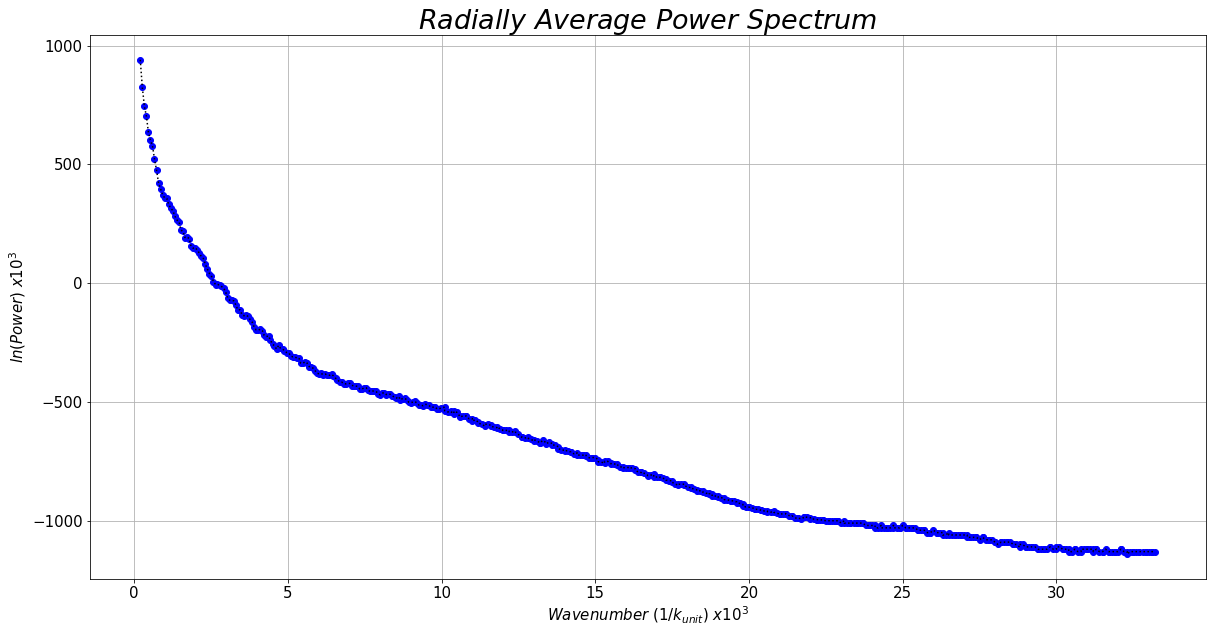

In [10]:
#Gerando o Gráfico do escpetro de potência:

x=dado.iloc[:,0]/1000 #Normalizando o gráfico 
y=dado.iloc[:,2]/1000 #Normalizando o gráfico

py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura

plt.plot( x, y, 'bo') # green bolinha
plt.plot( x, y, 'k:', color='black') # linha pontilha orange

plt.title("$Radially$ $Average$ $Power$ $Spectrum$", fontweight='normal', fontsize=27)
plt.tick_params(axis='both', labelsize=15)#aumenta o tamanho dos valores nos eixos

plt.grid(True)
plt.xlabel("$Wavenumber$ $(1/k_{unit})$ $x 10^{3}$", fontsize=15)
plt.ylabel("$ln (Power)$ $x 10^{3}$", fontsize=15)
plt.savefig('Imagens/SPW280118.eps')  
plt.show()  
plt.close()

The solution minimizes the squared error
    \begin{equation}
    E = \sum_{j=0}^k |p(x_j) - y_j|^2
    \end{equation}

in the equations::
    \begin{equation}
    x(0)^{n}  p(0) + ... + x(0)  p(n-1) + p(n) = y(0)\\
    x(1)^{n}  p(0) + ... + x(1)  p(n-1) + p(n) = y(1)\\
    ...\\
    x(k)^{n}  p(0) + ... + x(k)  p(n-1) + p(n) = y(k)\\
    \end{equation}


In [11]:
#Subdividindo o conjunto de dados em fonte profunda:

df = pd.DataFrame(index = dado)
deep = dado.head(22
                )
#dado.tail(5)w
print(deep)

             1.32E+02    1.25E+06  9.75E+05    4.08E+06   7.84E+06
NaN             198.0   1910000.0  940000.0   9030000.0  8270000.0
NaN             265.0   2440000.0  825000.0  11700000.0  9340000.0
NaN             331.0   3260000.0  746000.0   7310000.0  8540000.0
NaN             397.0   3700000.0  703000.0   6640000.0  6690000.0
NaN             463.0   4400000.0  636000.0   6120000.0  5400000.0
NaN             529.0   5060000.0  601000.0   3450000.0  4770000.0
NaN             595.0   5590000.0  578000.0   4730000.0  4790000.0
NaN             661.0   6410000.0  523000.0   6180000.0  5670000.0
NaN             728.0   6770000.0  475000.0   6100000.0  5670000.0
NaN             794.0   7580000.0  421000.0   4740000.0  4600000.0
NaN             860.0   8230000.0  397000.0   2970000.0  3320000.0
NaN             926.0   8710000.0  372000.0   2240000.0  2030000.0
NaN             992.0   9540000.0  359000.0    875000.0  1600000.0
NaN            1060.0   9860000.0  357000.0   1670000.0  17100

$r^{2}=$ 0.914081790896
a= -458.653161643
b= 870.276180596


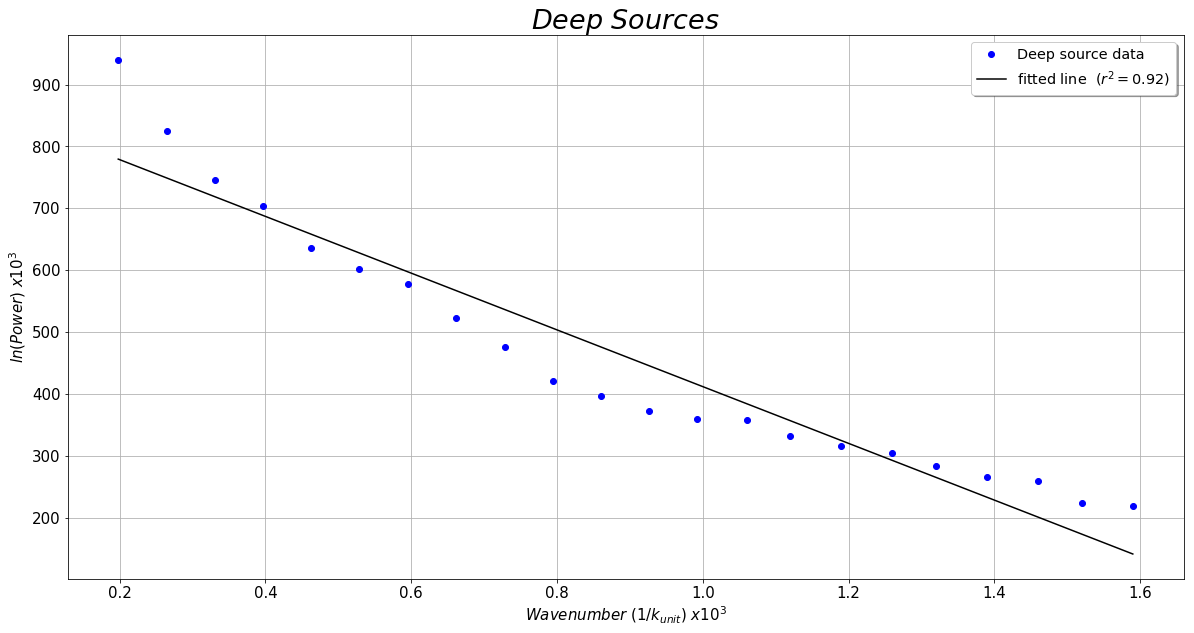

In [12]:
#Gerando o Gráfico do escpetro de potência para fontes profundas:



x=deep.iloc[:,0]/1000 #Normalizando o gráfico 
y=deep.iloc[:,2]/1000 #Normalizando o gráfico

#usando o polyfit
#p = np.polyfit(x, y,deg=1)
#p = np.poly1d(y)


#p = np.linalg.lstsq(dado,dado,rcond=-1)

#sm.OLS(x,y)


#usando o stats.linregress

#p = sp.stats.linregress(x,y)

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y) #Calcula a regressão
print("$r^{2}=$", r_value**2) # Cálculo do valor de ajuste
print("a=", slope)
print("b=", intercept)

py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura

plt.plot( x, y, 'bo', label='Deep source data') # green bolinha
#plt.plot( x, y, 'k:', color='black') # linha pontilha orange
#plt.plot( p, '--', color='black')
plt.plot(x, intercept + slope*x, 'black', label='fitted line  $(r^{2}=0.92)$')

legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.title("$Deep$ $Sources$", fontweight='normal', fontsize=27)
plt.tick_params(axis='both', labelsize=15)#aumenta o tamanho dos valores nos eixos

plt.grid(True)
plt.xlabel("$Wavenumber$ $(1/k_{unit})$ $x 10^{3}$", fontsize=15)
plt.ylabel("$ln (Power)$ $x 10^{3}$", fontsize=15)
plt.savefig('Imagens/Deep280118.eps')  
plt.show()  
plt.close()

In [13]:
#Subdividindo o conjunto de dados em fonte rasa:

df = pd.DataFrame(index = dado)
shallow=dado.tail(420)

#print(shallow)

$r^{2}=$ 0.955498311669
a= -29.5115831449
b= -271.500961707


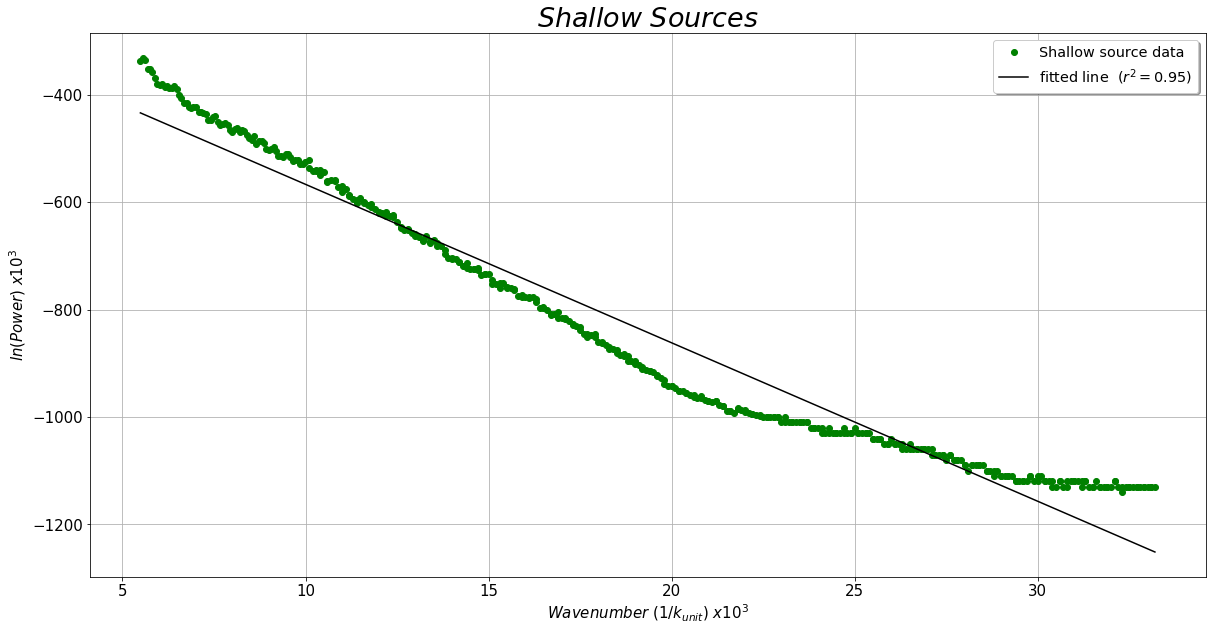

In [14]:
x=shallow.iloc[:,0]/1000 #Normalizando o gráfico 
y=shallow.iloc[:,2]/1000 #Normalizando o gráfico


slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y) #Calcula a regressão
print("$r^{2}=$", r_value**2) # Cálculo do valor de ajuste
print("a=", slope)
print("b=", intercept)

py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura

plt.plot( x, y, 'go', label='Shallow source data') # green bolinha
#plt.plot( x, y, 'k:', color='orange') # linha pontilha orange

plt.plot(x, intercept + slope*x, 'black', label='fitted line  $(r^{2}=0.95)$')

legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')


plt.title("$Shallow$ $Sources$", fontweight='normal', fontsize=27)
plt.tick_params(axis='both', labelsize=15)#aumenta o tamanho dos valores nos eixos

plt.grid(True)
plt.xlabel("$Wavenumber$ $(1/k_{unit})$ $x 10^{3}$", fontsize=15)
plt.ylabel("$ln (Power)$ $x 10^{3}$", fontsize=15)
plt.savefig('Imagens/Shallow280118.eps')  
plt.show()  
plt.close()

Tentativa de fazer uma apresentação